## 一、项目背景介绍    
&emsp;&emsp;力争2030年前实现碳达峰、2060年前实现碳中和，是以习近平同志为核心的党中央统筹国内国际两个大局作出的重大战略决策，是着力解决资源环境约束突出问题、实现中华民族永续发展的必然选择，是构建人类命运共同体的庄严承诺。对碳排放数据进行分析和预测，是精准实施个性化减排政策的重要决策依据。我们可以通过对全国各区县之前各年份碳排放量进行建模，来预测未来的碳排放量。

## 二、数据介绍      
&emsp;&emsp;本项目使用的是《中国县区碳排放数据（1997-2017年2735县区，根据2010年中国区划）》。排放清单根据中国统计局最新能源数据修订版（2015年）编制。由于方法的不同，采用表观排放量核算法和部门法得出的结果有时略有不同。    
&emsp;&emsp;数据集来自飞桨开源平台：https://aistudio.baidu.com/aistudio/datasetdetail/121687    
&emsp;&emsp;平台提供了数据下载，但是没有给出链接，在这里采用直接点击下载的方式下载使用。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import random

In [4]:
# 读取数据
country_data = pd.read_excel('C:/Users/lenovo/Desktop/202202飞桨/3、1997-2017年中国县区碳排放数据.xlsx')

&emsp;&emsp;首先查看一下原始数据。数据的各列分别为省、市、区县名及碳排放量数据。比较有特点的是，碳排放量将每一个具体的年份作为特征，放在列名中，形成一张“宽”表；而不是把所有年份放在一列，通过具体的年份数字来区分。

In [5]:
country_data.head()

,DISTCODE地区代码,County Name,County Name.1,City Name,City Name.1,Province Name,Province Name.1,C1997,C1998,C1999,...,C2008,C2009,C2010,C2011,C2012,C2013,C2014,C2015,C2016,C2017
0,340102,瑶海区,Yaohai District,合肥市,Hefei City,安徽省,Anhui Province,1.630068,1.538689,1.624000,...,3.371323,3.671851,3.990198,4.329686,4.348723,4.260311,4.180913,3.761643,3.755699,3.530521
1,340103,庐阳区,Luyang District,合肥市,Hefei City,安徽省,Anhui Province,1.192053,1.107413,1.170043,...,2.550246,2.777581,2.990014,3.171642,3.184190,3.119548,3.144285,2.883247,2.958616,2.908487
2,340104,蜀山区,Shushan District,合肥市,Hefei City,安徽省,Anhui Province,1.818297,1.692765,1.734692,...,4.180137,4.552764,4.888732,5.195696,5.218322,5.111806,4.963425,4.458935,4.437808,4.163056
3,340111,包河区,Baohe District,合肥市,Hefei City,安徽省,Anhui Province,1.557845,1.459316,1.477286,...,3.123715,3.423478,3.684567,4.145091,4.160545,4.091217,4.140434,3.792264,3.827954,3.682674
4,340121,长丰县,Changfeng County,合肥市,Hefei City,安徽省,Anhui Province,1.488242,1.471248,1.520304,...,4.413437,4.808134,5.275954,5.982387,6.481649,6.583311,6.956167,6.673773,7.097350,7.081446


&emsp;&emsp;然后查看一下数据信息和统计信息。可以看出数据非常干净，没有缺失，碳排放量数据全部为数值，没有特殊符号。

In [6]:
print(country_data.info())
country_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DISTCODE地区代码     2735 non-null   object 
 1   County Name      2735 non-null   object 
 2   County Name.1    2735 non-null   object 
 3   City Name        2735 non-null   object 
 4   City Name.1      2735 non-null   object 
 5   Province Name    2735 non-null   object 
 6   Province Name.1  2735 non-null   object 
 7   C1997            2735 non-null   float64
 8   C1998            2735 non-null   float64
 9   C1999            2735 non-null   float64
 10  C2000            2735 non-null   float64
 11  C2001            2735 non-null   float64
 12  C2002            2735 non-null   float64
 13  C2003            2735 non-null   float64
 14  C2004            2735 non-null   float64
 15  C2005            2735 non-null   float64
 16  C2006            2735 non-null   float64
 17  C2007         

,C1997,C1998,C1999,C2000,C2001,C2002,C2003,C2004,C2005,C2006,...,C2008,C2009,C2010,C2011,C2012,C2013,C2014,C2015,C2016,C2017
count,2.735000e+03,2.735000e+03,2.735000e+03,2.735000e+03,2.735000e+03,2.735000e+03,2.735000e+03,2.735000e+03,2.735000e+03,2.735000e+03,...,2.735000e+03,2.735000e+03,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,1.132310e+00,9.981466e-01,1.094239e+00,1.153700e+00,1.161458e+00,1.256806e+00,1.480538e+00,1.649662e+00,1.964944e+00,2.208331e+00,...,2.531056e+00,2.729384e+00,2.987684,3.335026,3.403462,3.421743,3.494318,3.301554,3.403800,3.466910
std,1.291937e+00,1.179350e+00,1.258753e+00,1.329549e+00,1.305338e+00,1.415608e+00,1.660022e+00,1.839047e+00,2.152650e+00,2.423703e+00,...,2.719357e+00,2.922415e+00,3.156076,3.398220,3.462145,3.369419,3.430163,3.256904,3.360074,3.391923
min,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,1.000000e-08,1.000000e-08,0.002445,0.008021,0.010848,0.018108,0.019116,0.017923,0.018662,0.023066
25%,3.227336e-01,3.075190e-01,3.336528e-01,3.610818e-01,3.583390e-01,4.041195e-01,4.785132e-01,5.388039e-01,6.523292e-01,7.303886e-01,...,8.514413e-01,9.314739e-01,1.040062,1.200393,1.241170,1.295726,1.312399,1.227927,1.250619,1.277242
50%,7.935184e-01,7.181670e-01,8.066667e-01,8.520158e-01,8.493330e-01,9.300292e-01,1.079145e+00,1.189021e+00,1.402417e+00,1.573569e+00,...,1.801819e+00,1.945624e+00,2.129255,2.391245,2.456762,2.507209,2.559330,2.411457,2.480445,2.542348
75%,1.540798e+00,1.294873e+00,1.448600e+00,1.518797e+00,1.572615e+00,1.683885e+00,1.988362e+00,2.227193e+00,2.644979e+00,2.939985e+00,...,3.359305e+00,3.617800e+00,3.977198,4.371520,4.451939,4.448972,4.562726,4.328865,4.462446,4.517797
max,2.574785e+01,2.513111e+01,2.708281e+01,2.868925e+01,2.716571e+01,2.948750e+01,3.358449e+01,3.669703e+01,4.130571e+01,4.681545e+01,...,4.876720e+01,5.348152e+01,56.428641,54.137138,55.564703,49.253514,49.417978,45.050951,46.075021,44.028280


&emsp;&emsp;接下来是查看数值的数据分布。这里选取某单列数据来展示。

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:title={'center':'Log Normal'}, xlabel='C2010'>

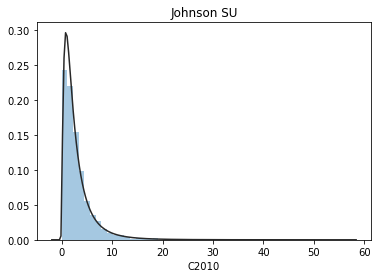

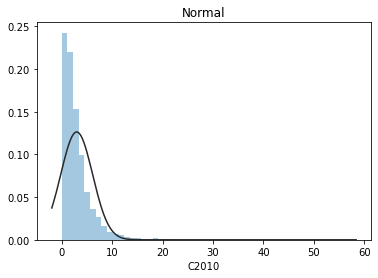

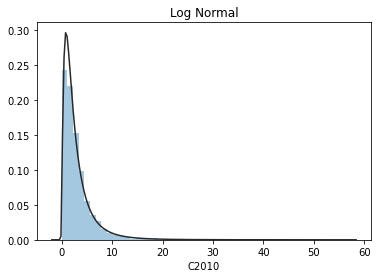

In [7]:
# 随机选取2010年数据，碳排放不服从正态分配，对数变换与无界约翰逊均拟合较好
y = country_data['C2010']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

## 三、模型介绍       
&emsp;&emsp;这是一个对连续变量的处理和预测，很明显属于回归类问题。
&emsp;&emsp;回归这个概念是19世纪80年代由英国统计学家郎西斯.高尔顿在研究父子身高关系提出来的，他发现：在同一族群中，子代的平均身高介于父代的身高以及族群的平均身高之间。具体而言，高个子父亲的儿子的身高有低于其父亲身高的趋势，而矮个子父亲的儿子身高则有高于父亲的身高的趋势。也就是说，子代的身高有向族群平均身高"平均"的趋势，这就是统计学上"回归"的最初含义。回归分析是一种预测性的建模技术，它研究的是因变量（目标）和自变量（特征）之间的关系。这种技术通常用于预测分析，时间序列模型以及发现变量之间的因果关系。通常使用曲线/线来拟合数据点，目标是使曲线到数据点的距离差异最小。    
&emsp;&emsp;目前常用的回归模型有Linear Regression线性回归、Decision Tree Regressor决策树回归、XGBoost回归等。在各类竞赛中，决策树与xgboost使用较为广泛；而在实际工程应用中，线性回归及其各种改进算法因为资源消耗少、速度快、泛化性好等原因而使用更为广泛。

&emsp;&emsp;本项目使用的数据集可以看作一种时序数据，自变量（之前各年碳排放）与因变量（预测年度碳排放）之间根据时序数据特性可知具有线性相关的特点。而且碳排放预测这个选题本身，对模型的泛化性能有一定要求。综合各方面因素，我们选取线性回归模型来进行预测。

&emsp;&emsp;线性回归假设目标值与特征之间线性相关，即满足一个多元一次方程。通过构建损失函数，来求解损失函数最小时的参数w ：                                                
&emsp;&emsp;假设：数据集$D = \{(x_1,y_1),...,(x_N,y_N) \}$，$x_i \in R^p,y_i \in R,i = 1,2,...,N$，$X = (x_1,x_2,...,x_N)^T,Y=(y_1,y_2,...,y_N)^T$                        
&emsp;&emsp;假设X和Y之间存在线性关系，模型的具体形式为$\hat{y}=f(w) =w^Tx$           
   ![jupyter](./1.4.png)      
&emsp;&emsp;(a) 最小二乘估计：                 
&emsp;&emsp;我们需要衡量真实值$y_i$与线性回归模型的预测值$w^Tx_i$之间的差距，在这里我们和使用二范数的平方和L(w)来描述这种差距，即：                      
   $$
   L(w) = \sum\limits_{i=1}^{N}||w^Tx_i-y_i||_2^2=\sum\limits_{i=1}^{N}(w^Tx_i-y_i)^2 = (w^TX^T-Y^T)(w^TX^T-Y^T)^T = w^TX^TXw - 2w^TX^TY+YY^T\\
   因此，我们需要找到使得L(w)最小时对应的参数w，即：\\
   \hat{w} = argmin\;L(w)\\
   为了达到求解最小化L(w)问题，我们应用高等数学的知识，使用求导来解决这个问题： \\
   \frac{\partial L(w)}{\partial w} = 2X^TXw-2X^TY = 0,因此： \\
   \hat{w} = (X^TX)^{-1}X^TY
   $$                      
&emsp;&emsp;(b) 几何解释：                
&emsp;&emsp;在线性代数中，我们知道两个向量a和b相互垂直可以得出：$<a,b> = a.b = a^Tb = 0$,而平面X的法向量为Y-Xw，与平面X互相垂直，因此：$X^T(Y-Xw) = 0$，即：$w = (X^TX)^{-1}X^TY$                             
   ![jupyter](./1.5.png)               
&emsp;&emsp;(c) 概率视角：       
&emsp;&emsp;假设噪声$\epsilon \backsim N(0,\sigma^2),y=f(w)+\epsilon=w^Tx+\epsilon$，因此：$y|x_i,w ~ N(w^Tx,\sigma^2)$          
&emsp;&emsp;我们使用极大似然估计MLE对参数w进行估计：       
   $$
   L(w) = log\;P(Y|X;w) = log\;\prod_{i=1}^N P(y_i|x_i;w) = \sum\limits_{i=1}^{N} log\; P(y_i|x_i;w)\\
    = \sum\limits_{i=1}^{N}log(\frac{1}{\sqrt{2\pi \sigma}}exp(-\frac{(y_i-w^Tx_i)^2}{2\sigma^2})) = \sum\limits_{i=1}^{N}[log(\frac{1}{\sqrt{2\pi}\sigma})-\frac{1}{2\sigma^2}(y_i-w^Tx_i)^2] \\
    argmax_w L(w) = argmin_w[l(w) = \sum\limits_{i = 1}^{N}(y_i-w^Tx_i)^2]\\
    因此：线性回归的最小二乘估计<==>噪声\epsilon\backsim N(0,\sigma^2)的极大似然估计
   $$

## 四、模型训练    
&emsp;&emsp;在进行建模前，需要选取数据的特征列，丢弃对模型无用的列。这一步骤同时也具有脱敏的作用，可以避免敏感数据被窃取。

In [8]:
country_data.columns

Index(['DISTCODE地区代码', 'County Name', 'County Name.1', 'City Name',
       'City Name.1', 'Province Name', 'Province Name.1', 'C1997', 'C1998',
       'C1999', 'C2000', 'C2001', 'C2002', 'C2003', 'C2004', 'C2005', 'C2006',
       'C2007', 'C2008', 'C2009', 'C2010', 'C2011', 'C2012', 'C2013', 'C2014',
       'C2015', 'C2016', 'C2017'],
      dtype='object')

In [9]:
clean_data = country_data.drop([ 'County Name', 'County Name.1', 'City Name','City Name.1', 'Province Name', 'Province Name.1'],axis=1)
clean_data.head()

,DISTCODE地区代码,C1997,C1998,C1999,C2000,C2001,C2002,C2003,C2004,C2005,...,C2008,C2009,C2010,C2011,C2012,C2013,C2014,C2015,C2016,C2017
0,340102,1.630068,1.538689,1.624000,1.708943,1.626726,1.769345,2.032668,2.224802,2.633549,...,3.371323,3.671851,3.990198,4.329686,4.348723,4.260311,4.180913,3.761643,3.755699,3.530521
1,340103,1.192053,1.107413,1.170043,1.264973,1.220263,1.315477,1.533915,1.678670,1.925550,...,2.550246,2.777581,2.990014,3.171642,3.184190,3.119548,3.144285,2.883247,2.958616,2.908487
2,340104,1.818297,1.692765,1.734692,1.845929,1.770184,2.177641,2.636810,2.892219,3.305631,...,4.180137,4.552764,4.888732,5.195696,5.218322,5.111806,4.963425,4.458935,4.437808,4.163056
3,340111,1.557845,1.459316,1.477286,1.549583,1.474717,1.602988,1.877636,2.075298,2.443113,...,3.123715,3.423478,3.684567,4.145091,4.160545,4.091217,4.140434,3.792264,3.827954,3.682674
4,340121,1.488242,1.471248,1.520304,1.620002,1.558837,1.683573,2.063170,2.279415,2.753702,...,4.413437,4.808134,5.275954,5.982387,6.481649,6.583311,6.956167,6.673773,7.097350,7.081446


In [10]:
index_data = country_data.set_index('DISTCODE地区代码')
feature_names = ['C1997', 'C1998',
       'C1999', 'C2000', 'C2001', 'C2002', 'C2003', 'C2004', 'C2005', 'C2006',
       'C2007', 'C2008', 'C2009', 'C2010', 'C2011', 'C2012', 'C2013', 'C2014',
       'C2015']

In [11]:
# 划分训练集和验证集
train_X = index_data[feature_names]
train_y = index_data['C2016']
# 通过之前的观察，发现数值呈长尾分布，且对数分布拟合较好
# 对标签进行 log(x+1) 变换，使标签贴近于正态分布
train_y_ln = np.log(train_y + 1)

The transformed price seems like normal distribution


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C2016', ylabel='Density'>

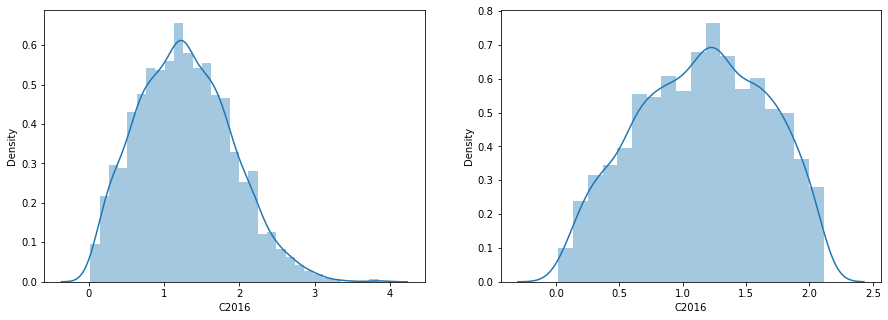

In [12]:
# 可视化观察标签是否已接近正态分布
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [13]:
# 训练模型
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y_ln)

In [14]:
# 查看截距（intercept）与权重(coef)
print('intercept:'+ str(model.intercept_))
sorted(dict(zip(feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:0.6894998827206338


[('C2005', 0.5530320536086845),
 ('C2009', 0.534142676310093),
 ('C2007', 0.42734589500768155),
 ('C1998', 0.36538886635240253),
 ('C2001', 0.3641681875720356),
 ('C2015', 0.2524832622960884),
 ('C2002', 0.24561659372906103),
 ('C2003', 0.19830305152162012),
 ('C2011', 0.13406268119446194),
 ('C2014', 0.11645734032905304),
 ('C1997', 0.11537544211905906),
 ('C2013', -0.10568320846850764),
 ('C2012', -0.1313352317389407),
 ('C2010', -0.2818998190049563),
 ('C1999', -0.4335628879938873),
 ('C2000', -0.4526638952901985),
 ('C2004', -0.5131275241304893),
 ('C2008', -0.5281743443830734),
 ('C2006', -0.6083925576927653)]

## 五、模型评估      
&emsp;&emsp;我们使用MAE，也即Mean Absolute Error，平均绝对值误差来评估模型的预测效果。MAE值越小，说明模型预测结果越准确。

In [18]:
# 五折交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [19]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [20]:
# 得到MAE的平均分数
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))
print('AVG:', np.mean(scores))

AVG: 0.01911357100975749


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [21]:
# 得到具体每一次训练的详细分数
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.019027,0.020238,0.012621,0.021752,0.021929


&emsp;&emsp;可以看出，模型的MAE值稳定在0.02左右，非常小而且稳定，完全达到了准确预测的目的。

## 六、总结与升华
&emsp;&emsp;当然，碳排放受多种因素影响，如经济发展速度、能源生产及使用量等等。仅仅依靠时序来进行预测，在短期内可能可以有较高的准确率，但是如果要进行长期宏观的预测，还需要增加更多时序之外的特征数据。
&emsp;&emsp;因为与碳排放相关的一些特征数据可能较为敏感，在此建议各位开源碳排放相关数据集及项目时，注意数据安全，严防敏感数据泄露。

## 七、个人总结
&emsp;&emsp;六一，数据挖掘爱好者，主要方向为结构化数据及时序数据的分析与挖掘。